##1. Загрузите файл HR.csv в pandas dataframe

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score


HR = 'https://raw.githubusercontent.com/andypgg/for-diplom/main/HR.csv'
data = pd.read_csv(HR, error_bad_lines=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## 2. Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [63]:

base_stat = []
base_stat.append(['mean' ,data['satisfaction_level'].mean(), data['last_evaluation'].mean(), data['number_project'].mean(), data['average_montly_hours'].mean(), data['time_spend_company'].mean(), data['Work_accident'].mean(), data['left'].mean(), data['promotion_last_5years'].mean()])
base_stat.append(['median' ,data['satisfaction_level'].median(), data['last_evaluation'].median(), data['number_project'].median(), data['average_montly_hours'].median(), data['time_spend_company'].median(), data['Work_accident'].median(), data['left'].median(), data['promotion_last_5years'].median()])
base_stat.append(['moda' ,data['satisfaction_level'].round().mode()[0], data['last_evaluation'].round().mode()[0], data['number_project'].round().mode()[0], data['average_montly_hours'].round().mode()[0], data['time_spend_company'].round().mode()[0], data['Work_accident'].round().mode()[0], data['left'].round().mode()[0], data['promotion_last_5years'].round().mode()[0]])
base_stat.append(['min' ,min(data['satisfaction_level']), min(data['last_evaluation']), min(data['number_project']), min(data['average_montly_hours']), min(data['time_spend_company']), min(data['Work_accident']), min(data['left']), min(data['promotion_last_5years'])])
base_stat.append(['max' ,max(data['satisfaction_level']), max(data['last_evaluation']), max(data['number_project']), max(data['average_montly_hours']), max(data['time_spend_company']), max(data['Work_accident']), max(data['left']), max(data['promotion_last_5years'])])
base_stat.append(['CKO' ,data['satisfaction_level'].std(), data['last_evaluation'].std(), data['number_project'].std(), data['average_montly_hours'].std(), data['time_spend_company'].std(), data['Work_accident'].std(), data['left'].std(), data['promotion_last_5years'].std()])
base_stat.append(['score' ,max(data['satisfaction_level']) - min(data['satisfaction_level']), max(data['last_evaluation']) - min(data['last_evaluation']), max(data['number_project']) - min(data['number_project']), max(data['average_montly_hours']) - min(data['average_montly_hours']), max(data['time_spend_company']) - min(data['time_spend_company']), max(data['Work_accident']) - min(data['Work_accident']), max(data['left']) -  min(data['left']), max(data['promotion_last_5years']) - min(data['promotion_last_5years'])])
base_stat.append(['disp' ,data['satisfaction_level'].var(), data['last_evaluation'].var(), data['number_project'].var(), data['average_montly_hours'].var(), data['time_spend_company'].var(), data['Work_accident'].var(), data['left'].var(), data['promotion_last_5years'].var()])

df = pd.DataFrame(base_stat, columns=['params', 'satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years'])

df

,params,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
1,median,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
2,moda,1.000000,1.000000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000
3,min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
4,max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
5,CKO,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
6,score,0.910000,0.640000,5.000000,214.000000,8.000000,1.000000,1.000000,1.000000
7,disp,0.061817,0.029299,1.519284,2494.313175,2.131998,0.123706,0.181411,0.020817


## 3. Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.Определите две самые скоррелированные и две наименеескоррелированные переменные.

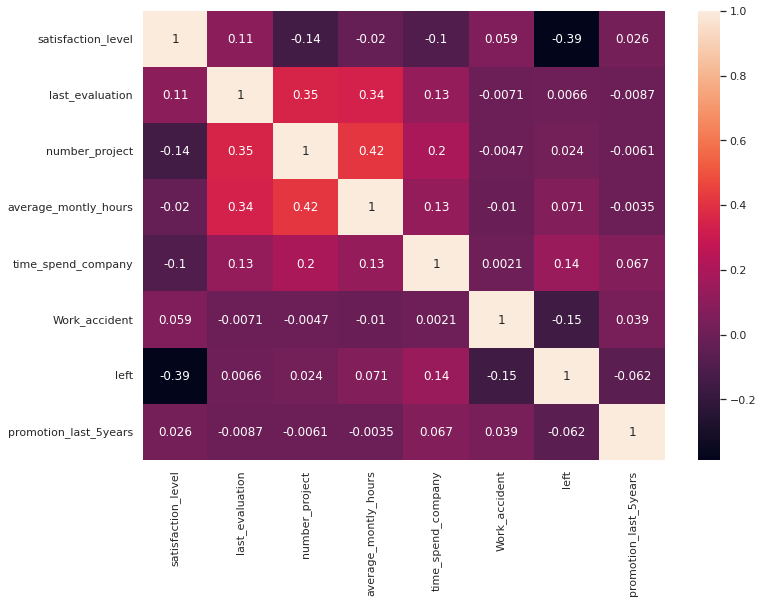

In [64]:
corr = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']].corr('pearson')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(corr, annot=True)

Две самые скоррелированные переменные:

* average_montly_hours
* number_project

Т.е. чем больше проектов у сотрудника тем больше у него рабочих часов

Две наименее скоррелированные переменные:

* Work_accident
* time_spend_company

Т.е. несчатные случае никак не влияют на время проведенное в компании, возможно это связано с тем что несчатных случаев не происходит, либо отличный дмс))

## 4. Рассчитайте сколько сотрудников работает в каждомдепартаменте.

In [65]:
df = data['department'].value_counts().reset_index()
df.columns = ['department', 'count']
df

,department,count
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


## 5. Показать распределение сотрудников по зарплатам.


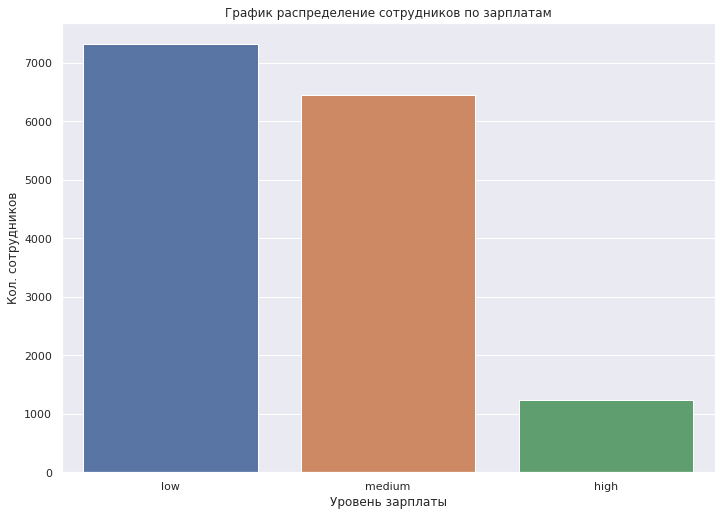

In [66]:
sns.countplot(data = data, x = 'salary')
plt.title('График распределение сотрудников по зарплатам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Кол. сотрудников')
plt.show()

## 6. Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности

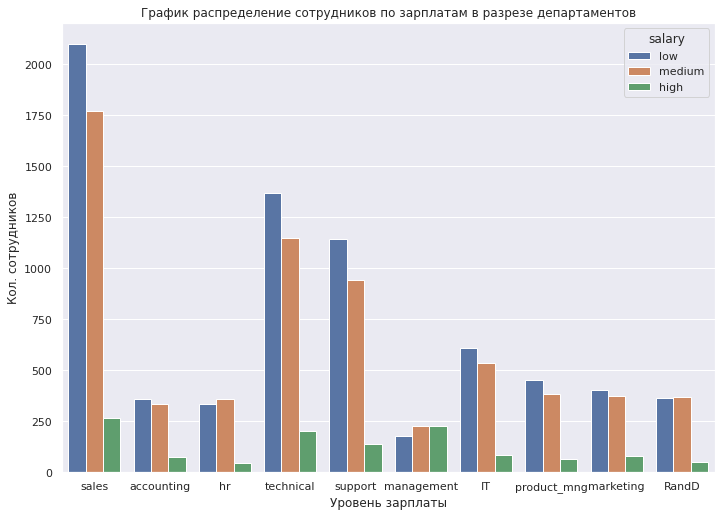

In [70]:
sns.countplot(data = data, x = 'department', hue = 'salary')
plt.title('График распределение сотрудников по зарплатам в разрезе департаментов')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Кол. сотрудников')
plt.show()

## 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [71]:
#выдвенем теории: 
#H0 - Сотрудники с высокой зарплатой и сотрудники с низкой зарплатой проводят на работе одинаковое колл. времени.
#H1 - Сотрудники с высокой зарплатой и сотрудники с низкой зарплатой проводят на работе не одинаковое колл. времени.

alpha = 0.05   #установим уровень значимости
df_high_zp = data[data['salary'] == 'high']['average_montly_hours']
df_low_zp = data[data['salary'] == 'low']['average_montly_hours']
p_value = stats.ttest_ind(df_high_zp, df_low_zp, equal_var = False)
print('p_value', p_value.pvalue)
if p_value.pvalue < alpha: 
    print('Отвергаем нулевую гипотезу, сотрудники с низкой и высокой зарплатой проводят на работе разное колл. времени')
    print('Среднее колл. времени проводимое на работе сотрудниками с высокой зарплатой =', df_high_zp.mean(), 'и низкой зарплатой =', df_low_zp.mean())
else:
    print('Не отвергаем нулевую гипотезу, сотрудники с низкой и высокой зарплатой проводят на работе одинаковое колл. времени')
    print('Среднее колл. времени проводимое на работе сотрудниками с высокой зарплатой =', df_high_zp.mean(), 'и низкой зарплатой =', df_low_zp.mean())

p_value 0.4459045542257889
Не отвергаем нулевую гипотезу, сотрудники с низкой и высокой зарплатой проводят на работе одинаковое колл. времени
Среднее колл. времени проводимое на работе сотрудниками с высокой зарплатой = 199.86742118027485 и низкой зарплатой = 200.9965828321487


## 8. Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет

* Средняя степень удовлетворенности

* Среднее количество проектов

In [74]:
params = {0: 'Оставшиеся сотрудники',
         1: 'Уволившиеся сотрудники'}

for number in range(2):
    print(params[number])
    print(f"Доля сотрудников с повышением за последние 5 лет: {float('{:.2f}'.format((len(data[data['left'] == number][data['promotion_last_5years'] == 1]) / len(data[data['left'] == number][data['promotion_last_5years'] == 0])) * 100))}%")
    print(f"Средняя степень удовлетворенности: {float('{:.2f}'.format((data[data['left'] == number]['satisfaction_level'].mean() * 100)))}%")
    print(f"Среднее количество проектов: {float('{:.2f}'.format(data[data['left'] == number]['number_project'].mean()))}")
    print()

Оставшиеся сотрудники
Доля сотрудников с повышением за последние 5 лет: 2.7%
Средняя степень удовлетворенности: 66.68%
Среднее количество проектов: 3.79

Уволившиеся сотрудники
Доля сотрудников с повышением за последние 5 лет: 0.53%
Средняя степень удовлетворенности: 44.01%
Среднее количество проектов: 3.86



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


## 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился лисотрудник на основе имеющихся факторов (кроме department и salary)Оценить качество модели на тестовой выборки


In [75]:
data_test = data[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 
             'Work_accident', 'promotion_last_5years']]
data_target = data['left']
X_train, X_test, y_train, y_test = train_test_split(data_test, data_target, test_size=0.30)
lda = LinearDiscriminantAnalysis()
# обучаем данные
lda.fit(X_train, y_train)
# Прогноз
lda.predict(X_test)
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
# расчет точности
accuracy_score(y_test, lda.predict(X_test))

0.7622222222222222

точность модели 76% это означает что модель модет предсказать 3/4 случаев уволится сотрудик или нет.